In [1]:
import logging
import os
import sys

working_dir = "/p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/"

logging.basicConfig(filename=os.path.join(working_dir, 'error_log.txt'), level=logging.ERROR, filemode='w',
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

"""logging.basicConfig(
    filemode='w',
    level=logging.ERROR,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('error_log.txt'),
        logging.StreamHandler(sys.stdout)
    ]
)

logger = logging.getLogger(__name__)"""

"logging.basicConfig(\n    filemode='w',\n    level=logging.ERROR,\n    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',\n    handlers=[\n        logging.FileHandler('error_log.txt'),\n        logging.StreamHandler(sys.stdout)\n    ]\n)\n\nlogger = logging.getLogger(__name__)"

In [2]:
from pcmdi_metrics.mean_climate.lib_unified import (
    get_unique_bases, process_dataset, calculate_and_save_metrics, extract_info_from_model_catalogue, 
    get_ref_catalogue, get_model_catalogue, 
    multi_level_dict, print_dict, write_to_json
)
import os
import datetime


from pcmdi_metrics.utils import create_target_grid

In [3]:
variables = [
    #"pr", "ua-200", "ua-850", "va-200", "ta-850",
    "rsdt", "rsut", "rsutcs", "rlut", "rlutcs", 
    "rstcre", "rltcre", "rt", "rst"
]  # optional. If given, prioritized over the model_catalogue.json. If not given, use all variables commonly in ref_catalogue.json and model_catalogue.json

#variables = [
#    "ua-200", "ua-850", "va-200"
#]

model_data_path_template = "/home/data/%(model)/%(var)/%(model)_%(run)_%(var)_blabla.nc"  # optional. If given, prioritized over model_catalogue.json

models = ["model-a", "model-b"]  # optional. If given, prioritized over the model_catalogue.json. If not given, use all models in model_catalogue.json

models_runs_dict = {
    "model-a": ["r1", "r2"],
    "model-b": ["r1", "r2"],
    "model-c": ["r1", "r2"],
}
# optional. If given, prioritized over the model_catalogue.json. If not given, use all runs in model_catalogue.json

In [4]:
interim_output_path_dict = {
    "ref": {
        #"path_ac": "/p/user_pub/PCMDIobs/obs4MIPs_clims/%(var)/gn",
        #"path_ac_interp": "/p/user_pub/PCMDIobs/obs4MIPs_clims/%(var)/gr"
        "path_ac": "/p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/obs4MIPs_clims/%(var)/gn",
        "path_ac_interp": "/p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/obs4MIPs_clims/%(var)/gr"
    },
    "model": {
        "path_ac": "/p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/clims_model/%(var)/gn",
        "path_ac_interp": "/p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/clims_model/%(var)/gr"
    }
}

output_path = "/p/user_pub/climate_work/lee1043/temporary/mean_climate_workflow_refactorization/output/json"

regions = ["NHEX", "SHEX"]

target_grid = "2.5x2.5"

ref_catalogue_file_path = '/p/user_pub/PCMDIobs/catalogue/obs4MIPs_PCMDI_monthly_byVar_catalogue_v20240716.json'
model_catalogue_file_path = 'model_catalogue.json'

ref_data_head = "/p/user_pub/PCMDIobs"  # optional, if ref_catalogue file does not include entire directory path

In [5]:
rad_diagnostic_variables = ["rt", "rst", "rstcre", "rltcre"]

default_regions = ["global", "NHEX", "SHEX", "TROPICS"]

In [6]:
if not regions:
    regions = default_regions

In [7]:
refs_dict = get_ref_catalogue(ref_catalogue_file_path, ref_data_head)
models_dict = get_model_catalogue(model_catalogue_file_path, variables, models, models_runs_dict, model_data_path_template)

In [8]:
if any(var is None for var in (variables, models, models_runs_dict)): 
    variables, models, models_runs_dict = extract_info_from_model_catalogue(variables, models, models_runs_dict, refs_dict, models_dict)

In [9]:
common_grid = create_target_grid(target_grid_resolution=target_grid)

variables_unique: ['hfls', 'hfns', 'hfss', 'hur', 'hus', 'pr', 'prw', 'psl', 'rlds', 'rldscs', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsus', 'rsuscs', 'rsut', 'rsutcs', 'rt', 'sfcWind', 'ta', 'tas', 'tasmax', 'tasmin', 'tauu', 'tauv', 'ts', 'ua', 'uas', 'va', 'vas', 'zg', 'zos']
variables_level_dict: {'hfls': [None], 'hfns': [None], 'hfss': [None], 'hur': [None], 'hus': [None], 'pr': [None], 'prw': [None], 'psl': [None], 'rlds': [None], 'rldscs': [None], 'rltcre': [None], 'rlus': [None], 'rlut': [None], 'rlutcs': [None], 'rsds': [None], 'rsdscs': [None], 'rsdt': [None], 'rstcre': [None], 'rsus': [None], 'rsuscs': [None], 'rsut': [None], 'rsutcs': [None], 'rt': [None], 'sfcWind': [None], 'ta': [None], 'tas': [None], 'tasmax': [None], 'tasmin': [None], 'tauu': [None], 'tauv': [None], 'ts': [None], 'ua': [None], 'uas': [None], 'va': [None], 'vas': [None], 'zg': [None], 'zos': [None]}
version: v20250113
var: hfls
=== var, ref: hfls, ERA-INT
Processing data

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/xcdat/regridder/regrid2.py:196: RuntimeWarning: invalid value encountered in divide
  np.divide(


regrid done, ds_ac_level_interp[hfls].shape: (12, 72, 144)
plot_gr here for hfls_mon_TropFlux-1-0_PCMDI_gn_198101-201312_AC_interp_2.5x2.5.png
var: hfns
=== var, ref: hfns, TropFlux-1-0
Processing data for: TropFlux-1-0
Processing ref dataset - varname: hfns, data: TropFlux-1-0, path: /p/user_pub/PCMDIobs/obs4MIPs/ESSO/TropFlux-1-0/mon/hfns/gn/v20210727/hfns_mon_TropFlux-1-0_PCMDI_gn_197901-201707.nc
ver: v20250113
ver: v20250113
get_annual_cycle, var: hfns
data_path: /p/user_pub/PCMDIobs/obs4MIPs/ESSO/TropFlux-1-0/mon/hfns/gn/v20210727/hfns_mon_TropFlux-1-0_PCMDI_gn_197901-201707.nc
out_path: /p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/obs4MIPs_clims/hfns/gn
outfilename_head: hfns_mon_TropFlux-1-0_PCMDI_gn
outfilename_template: hfns_mon_TropFlux-1-0_PCMDI_gn_%(start-yyyymm)-%(end-yyyymm)_%(season).nc
ver: v20250113
infilename: hfns_mon_TropFlux-1-0_PCMDI_gn_197901-201707.nc
type(d): <class 'xarray.core.dataset.Dataset'>
atts: {'C

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/xcdat/regridder/regrid2.py:196: RuntimeWarning: invalid value encountered in divide
  np.divide(


regrid done, ds_ac_level_interp[hfns].shape: (12, 72, 144)
plot_gr here for hfns_mon_TropFlux-1-0_PCMDI_gn_198101-201312_AC_interp_2.5x2.5.png
var: hfss
=== var, ref: hfss, ERA-INT
Processing data for: ERA-INT
Processing ref dataset - varname: hfss, data: ERA-INT, path: /p/user_pub/PCMDIobs/obs4MIPs/ECMWF/ERA-INT/mon/hfss/gn/v20210727/hfss_mon_ERA-INT_PCMDI_gn_197901-201903.nc
ver: v20250113
ver: v20250113
get_annual_cycle, var: hfss
data_path: /p/user_pub/PCMDIobs/obs4MIPs/ECMWF/ERA-INT/mon/hfss/gn/v20210727/hfss_mon_ERA-INT_PCMDI_gn_197901-201903.nc
out_path: /p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/obs4MIPs_clims/hfss/gn
outfilename_head: hfss_mon_ERA-INT_PCMDI_gn
outfilename_template: hfss_mon_ERA-INT_PCMDI_gn_%(start-yyyymm)-%(end-yyyymm)_%(season).nc
ver: v20250113
infilename: hfss_mon_ERA-INT_PCMDI_gn_197901-201903.nc
type(d): <class 'xarray.core.dataset.Dataset'>
atts: {'Conventions': 'CF-1.7 ODS-2.1', 'activity_id': 'o

/home/lee1043/.conda/envs/pcmdi_metrics_dev_20241216/lib/python3.10/site-packages/xcdat/regridder/regrid2.py:196: RuntimeWarning: invalid value encountered in divide
  np.divide(


regrid done, ds_ac_level_interp[hfss].shape: (12, 72, 144)
plot_gr here for hfss_mon_TropFlux-1-0_PCMDI_gn_198101-201312_AC_interp_2.5x2.5.png
var: hur
=== var, ref: hur, ERA-40
Processing data for: ERA-40
Processing ref dataset - varname: hur, data: ERA-40, path: /p/user_pub/PCMDIobs/obs4MIPs/ECMWF/ERA-40/mon/hur/gn/v20210727/hur_mon_ERA-40_PCMDI_gn_195709-200208.nc
ver: v20250113
ver: v20250113
get_annual_cycle, var: hur
data_path: /p/user_pub/PCMDIobs/obs4MIPs/ECMWF/ERA-40/mon/hur/gn/v20210727/hur_mon_ERA-40_PCMDI_gn_195709-200208.nc
out_path: /p/user_pub/climate_work/lee1043/cdat/pmp/mean_climate/mean_climate_workflow_refactorization/output/obs4MIPs_clims/hur/gn
outfilename_head: hur_mon_ERA-40_PCMDI_gn
outfilename_template: hur_mon_ERA-40_PCMDI_gn_%(start-yyyymm)-%(end-yyyymm)_%(season).nc
ver: v20250113
infilename: hur_mon_ERA-40_PCMDI_gn_195709-200208.nc
type(d): <class 'xarray.core.dataset.Dataset'>
atts: {'Conventions': 'CF-1.7 ODS-2.1', 'PreparationInfo': 'PJG', 'activity_id'

ValueError: failed to prevent overwriting existing key calendar in attrs on variable 'time'. This is probably an encoding field used by xarray to describe how a variable is serialized. To proceed, remove this key from the variable's attributes manually.

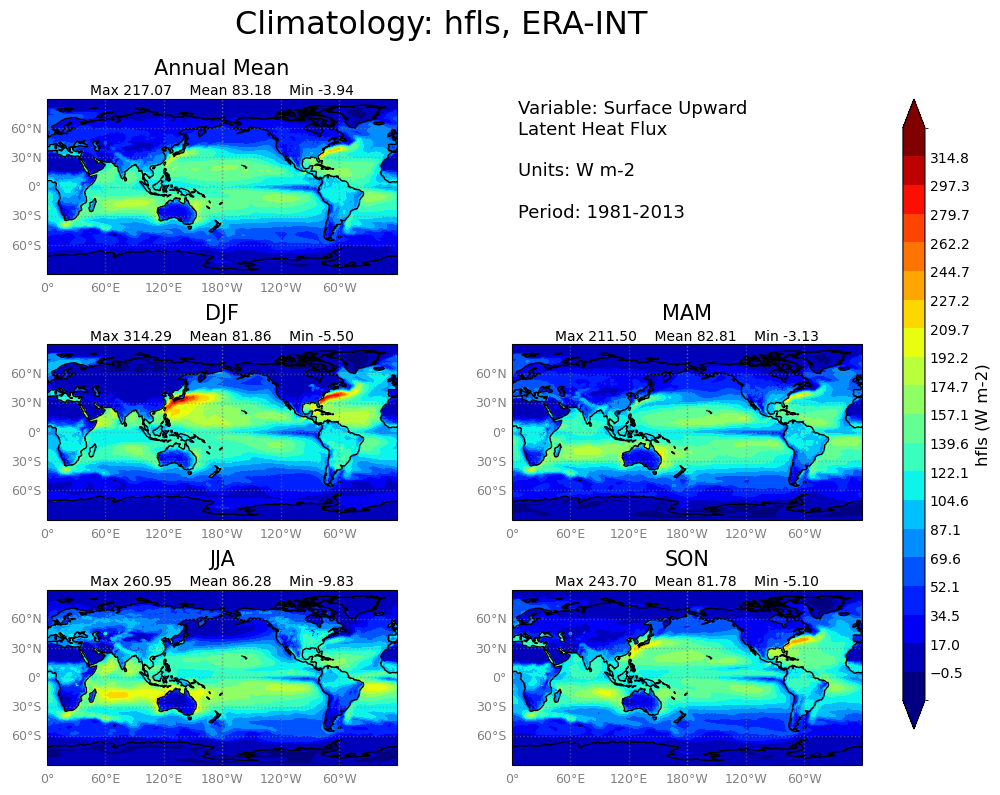

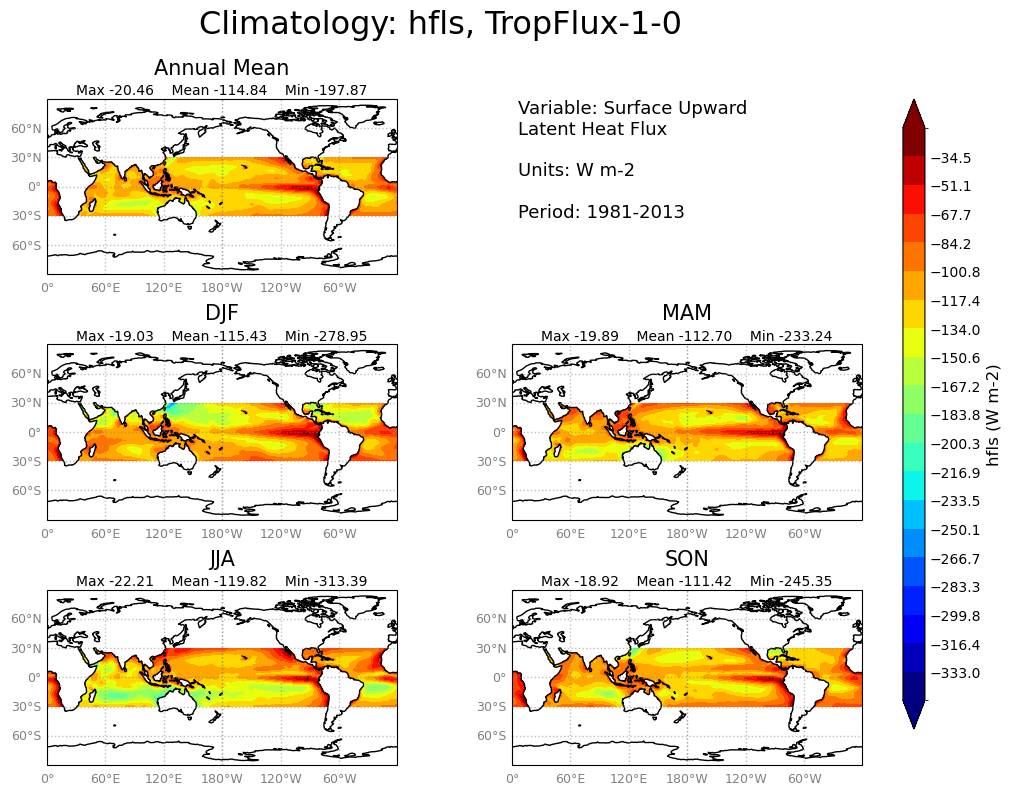

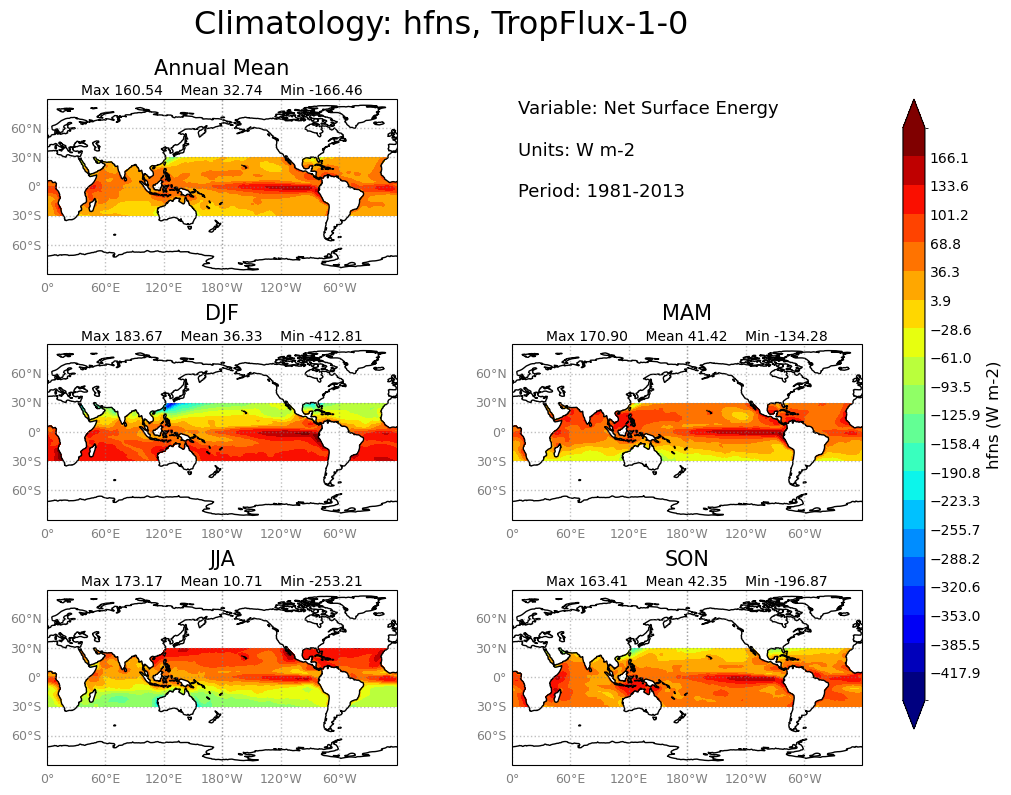

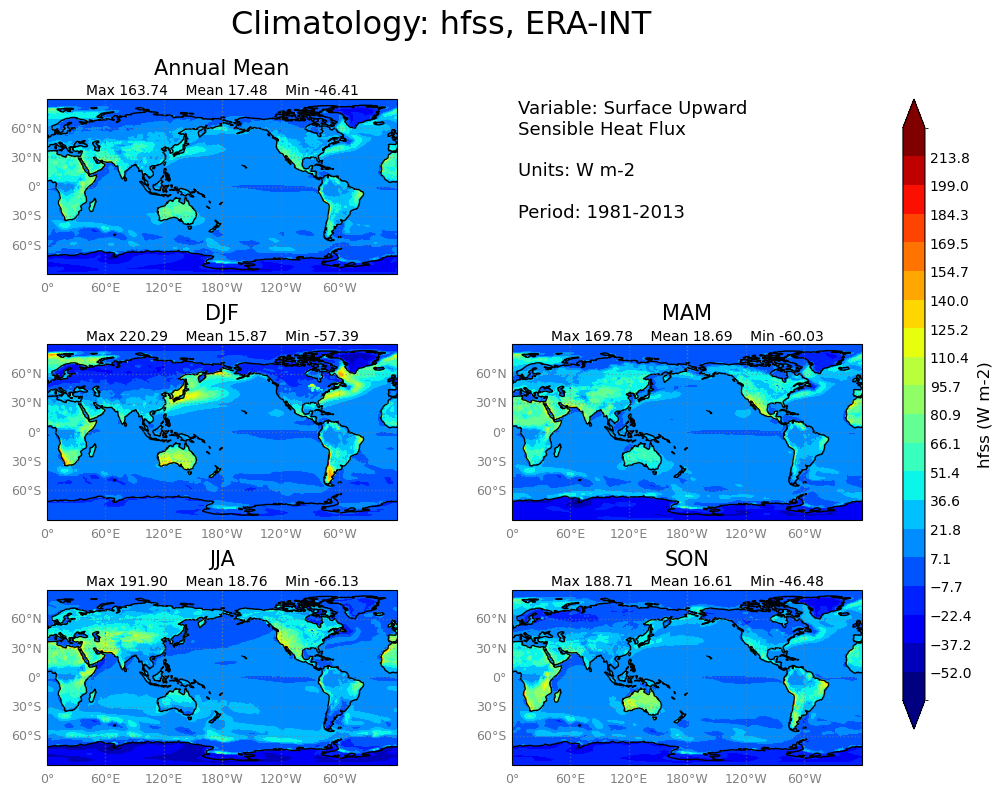

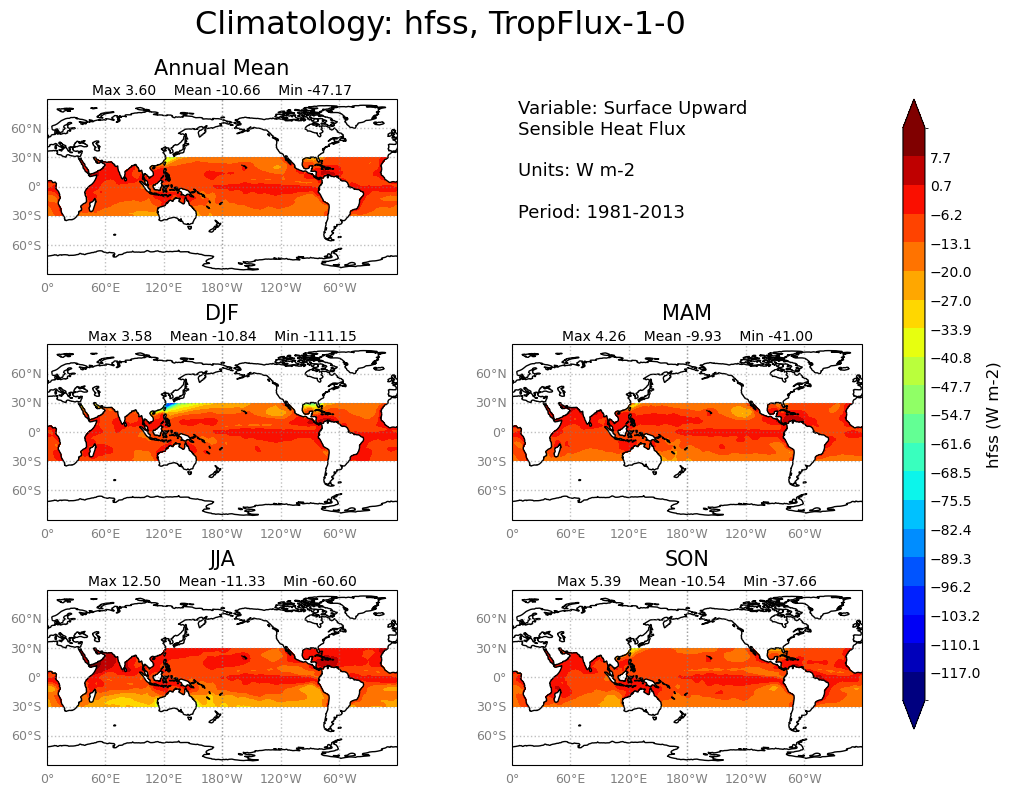

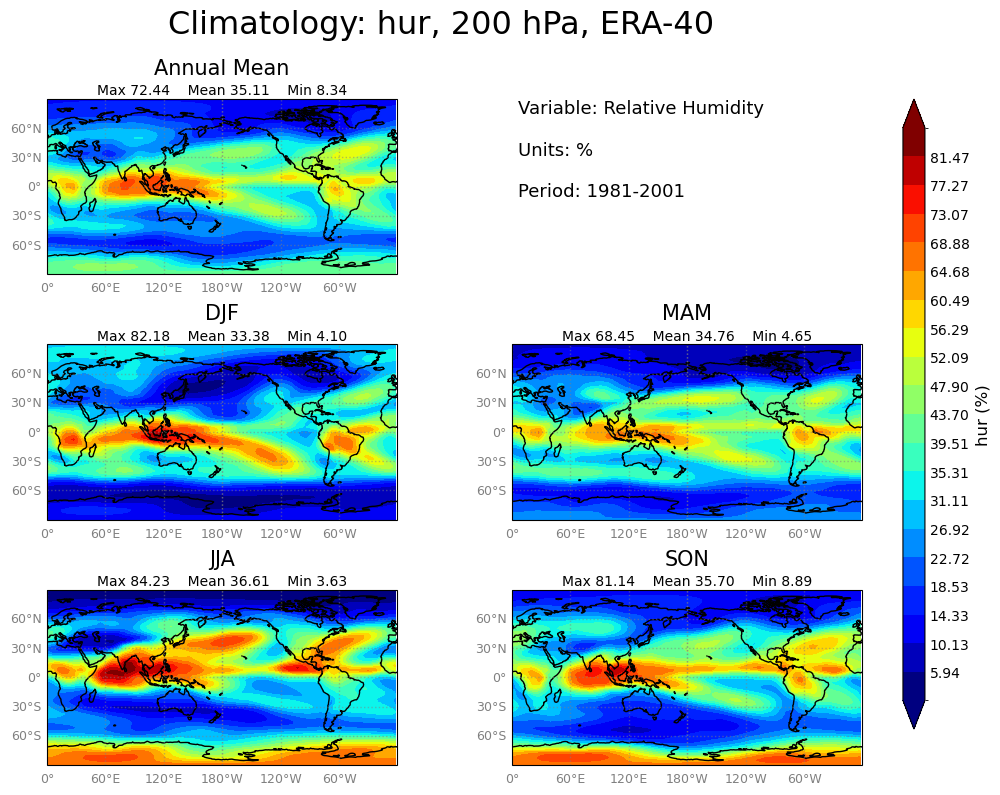

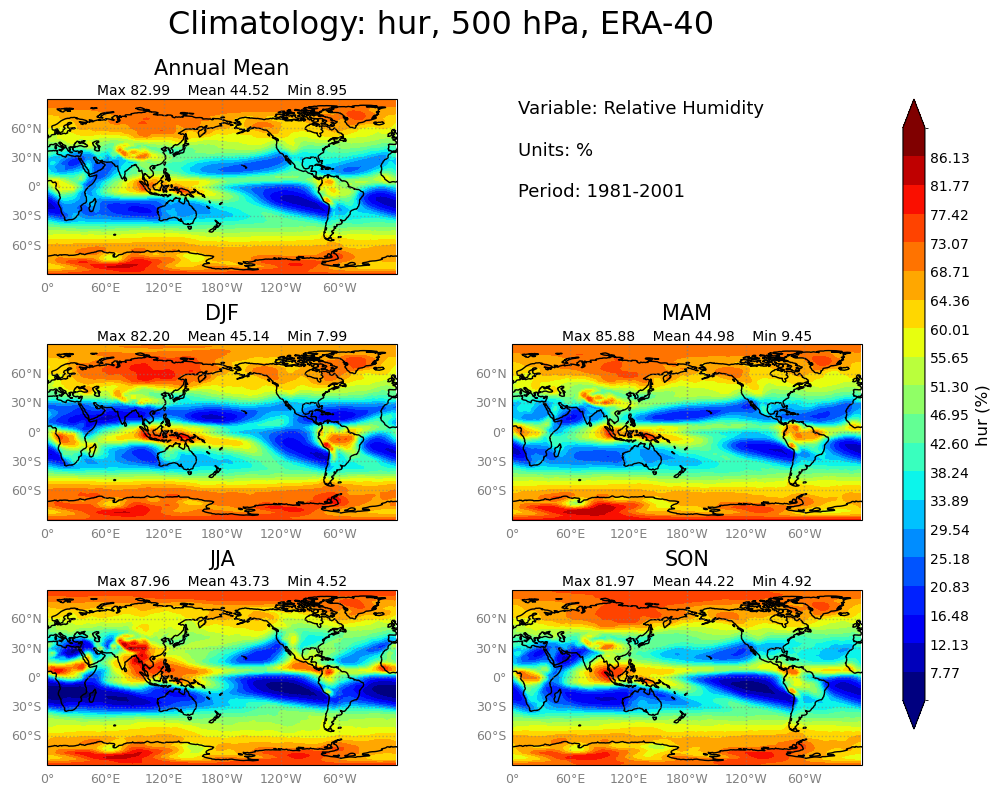

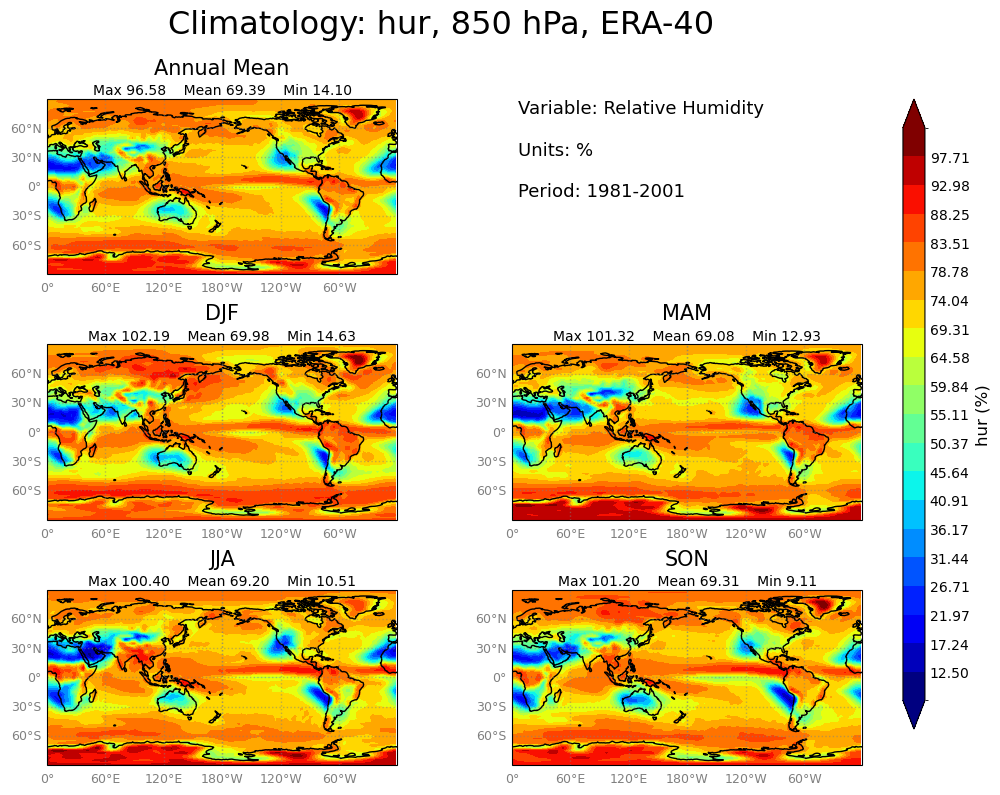

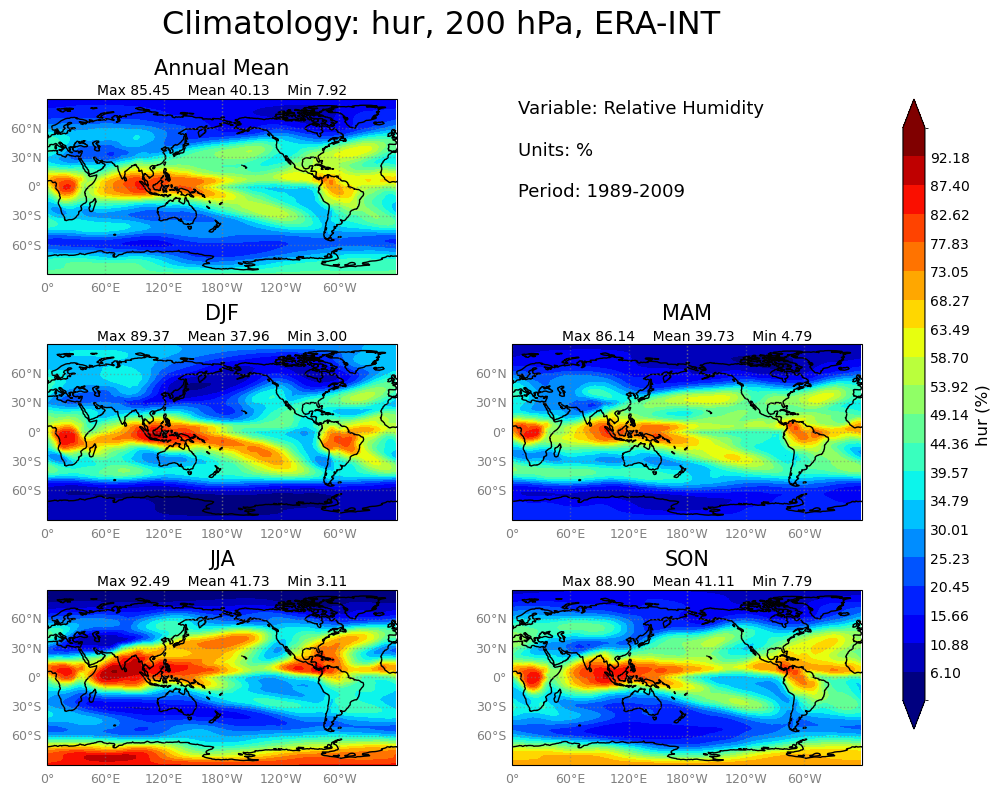

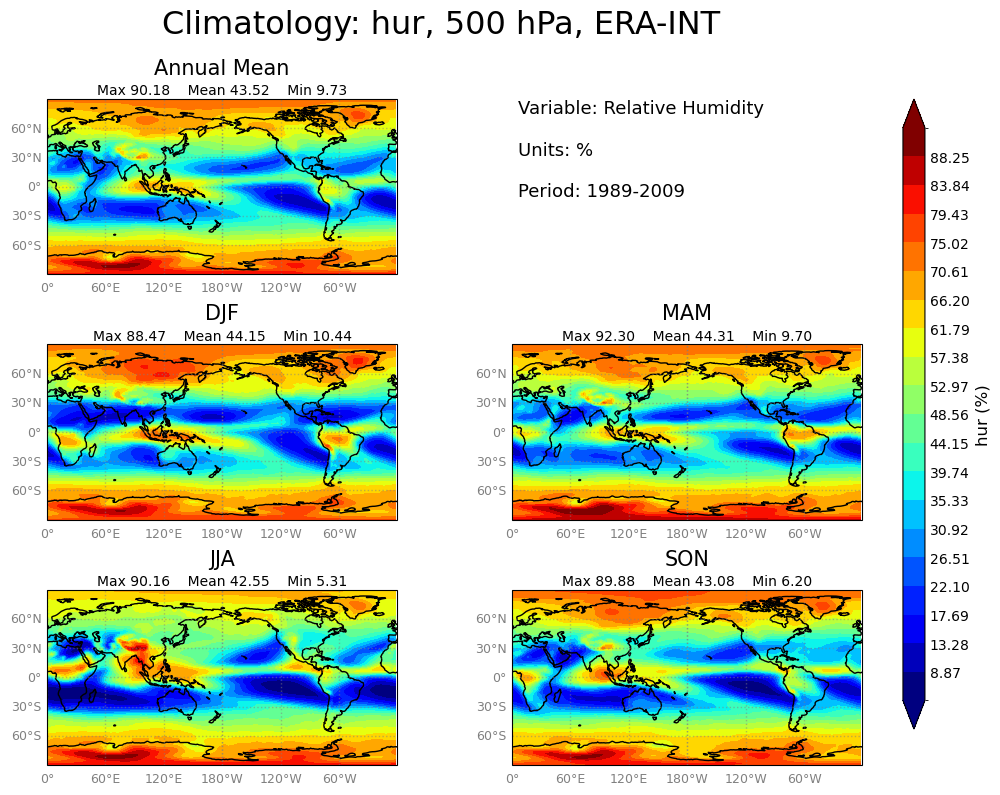

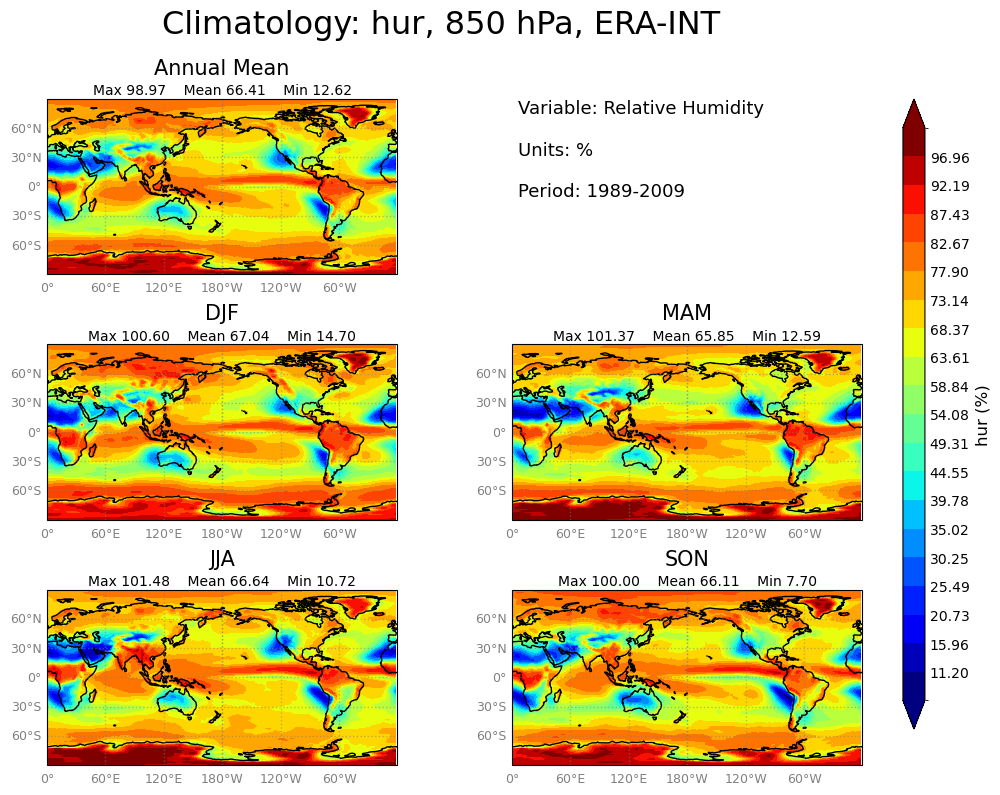

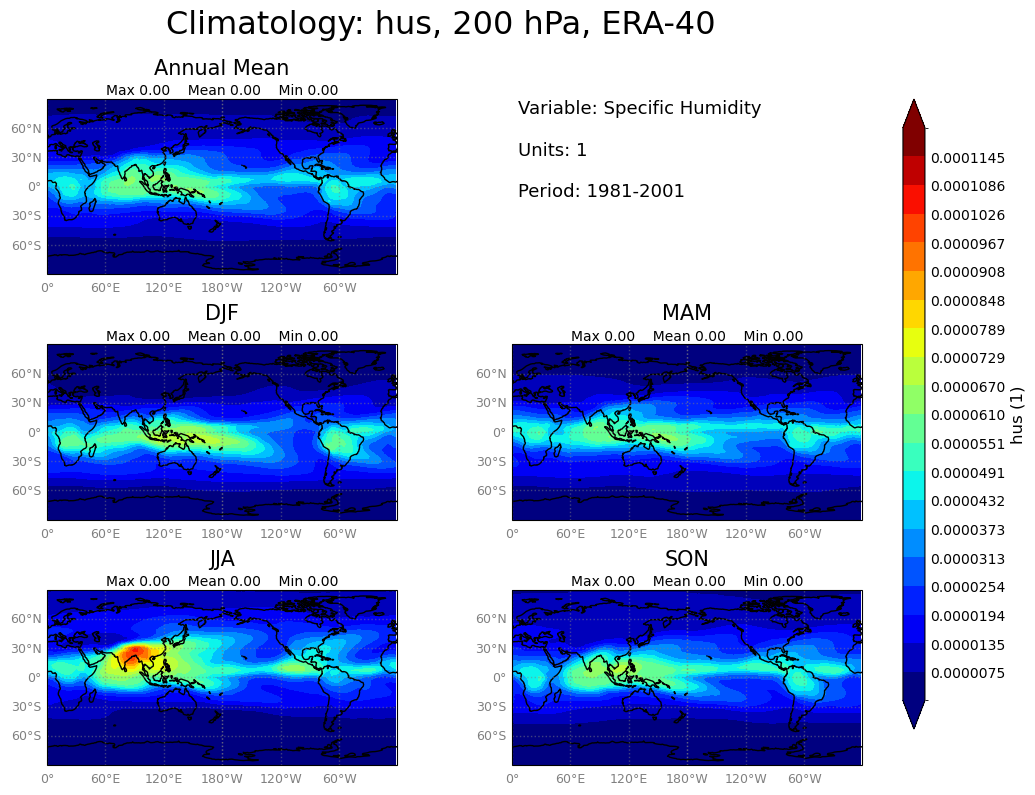

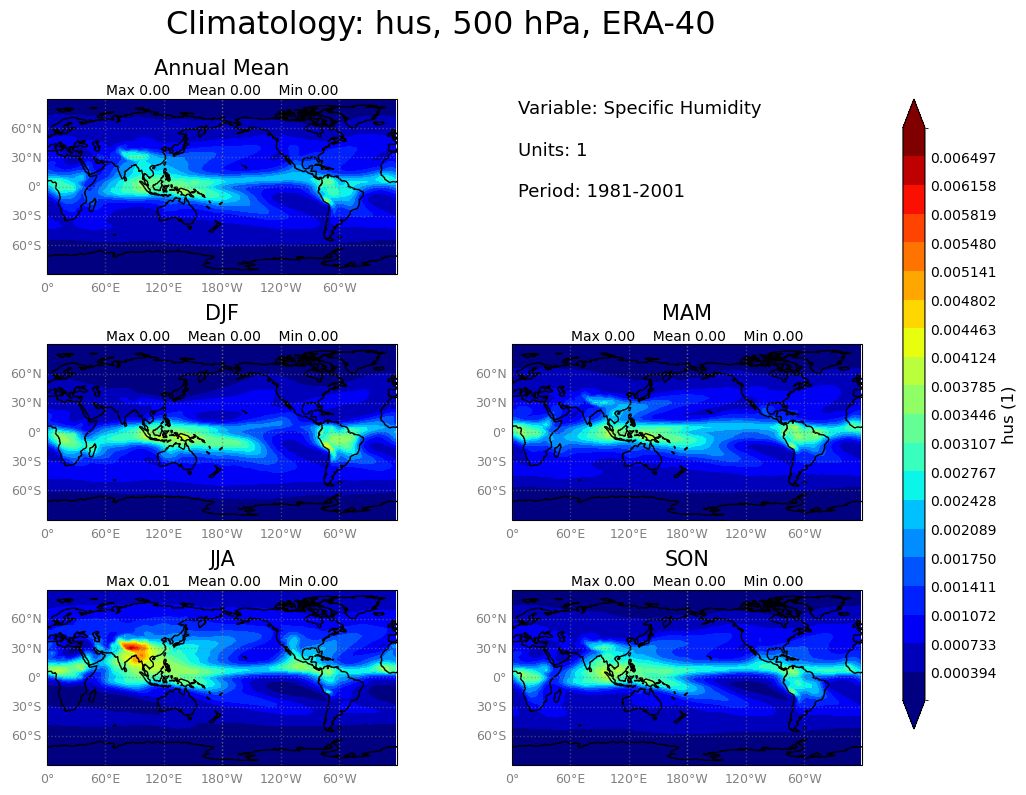

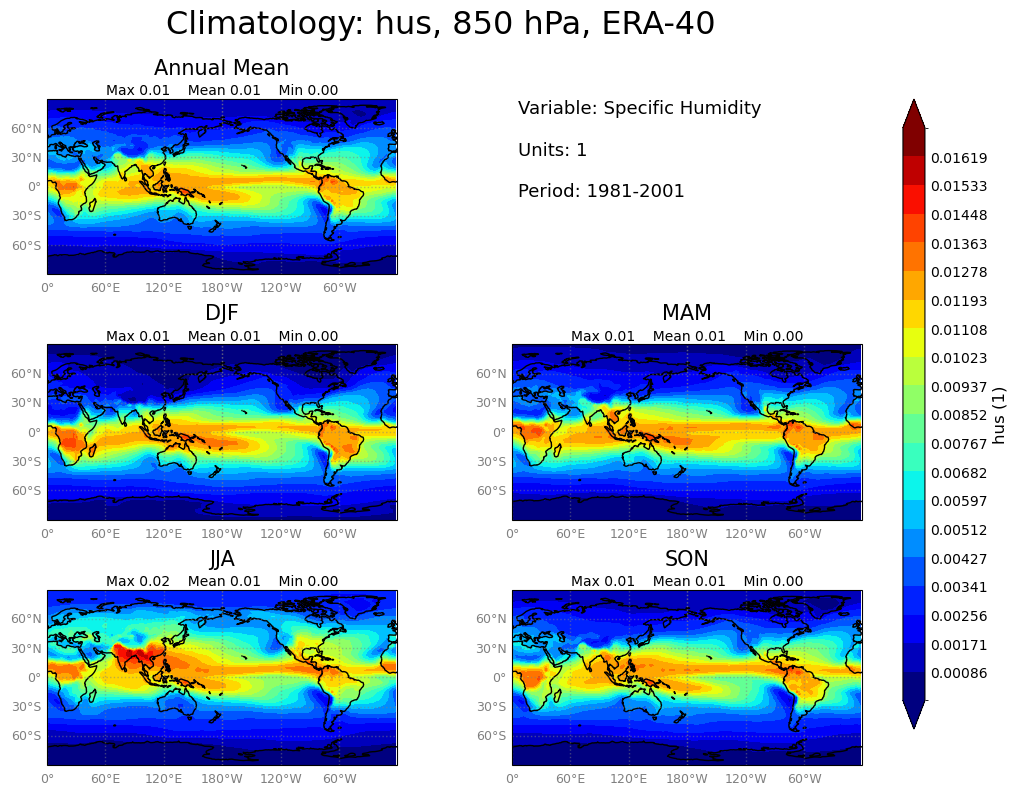

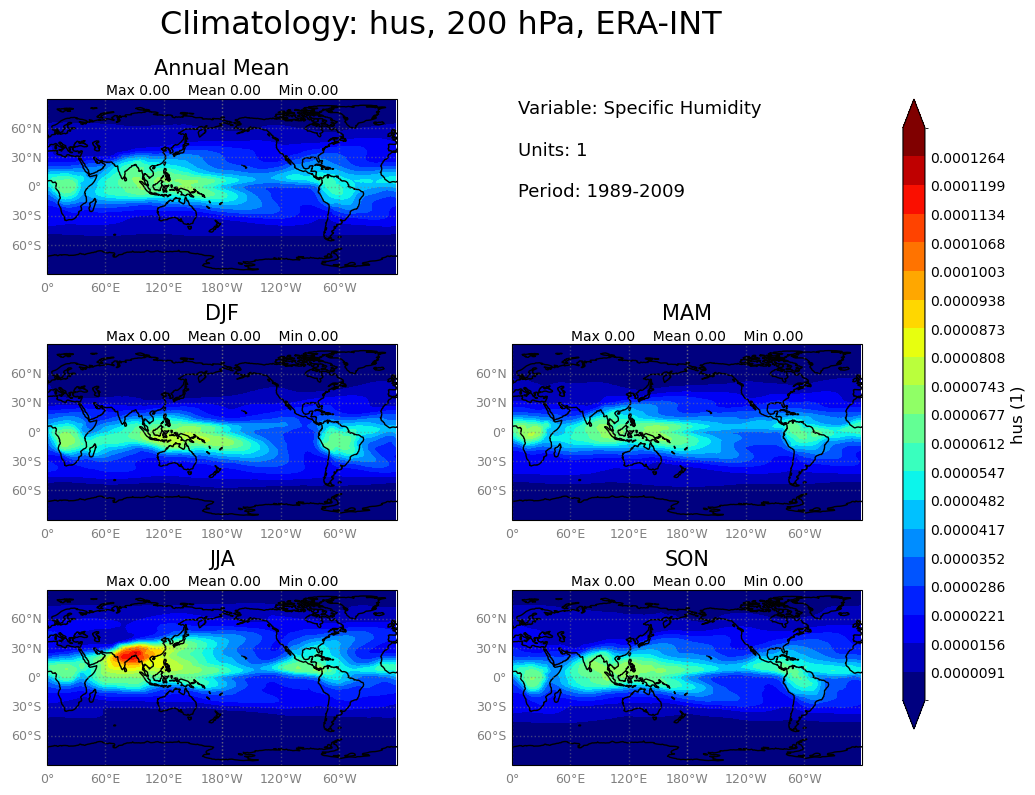

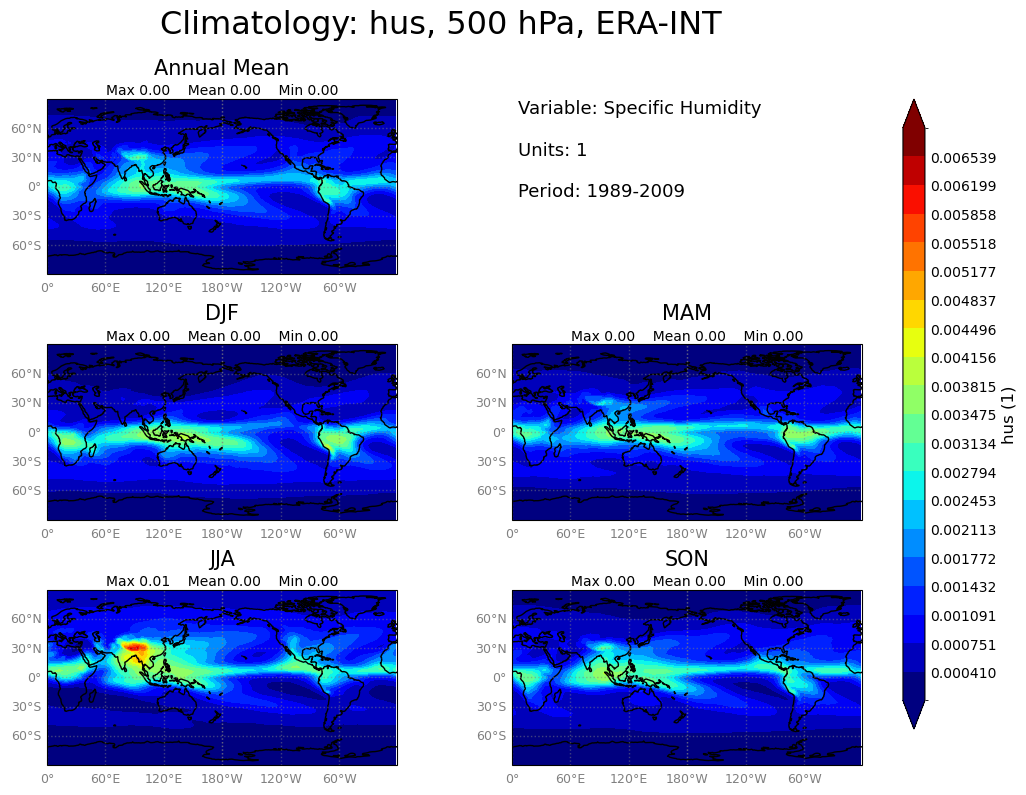

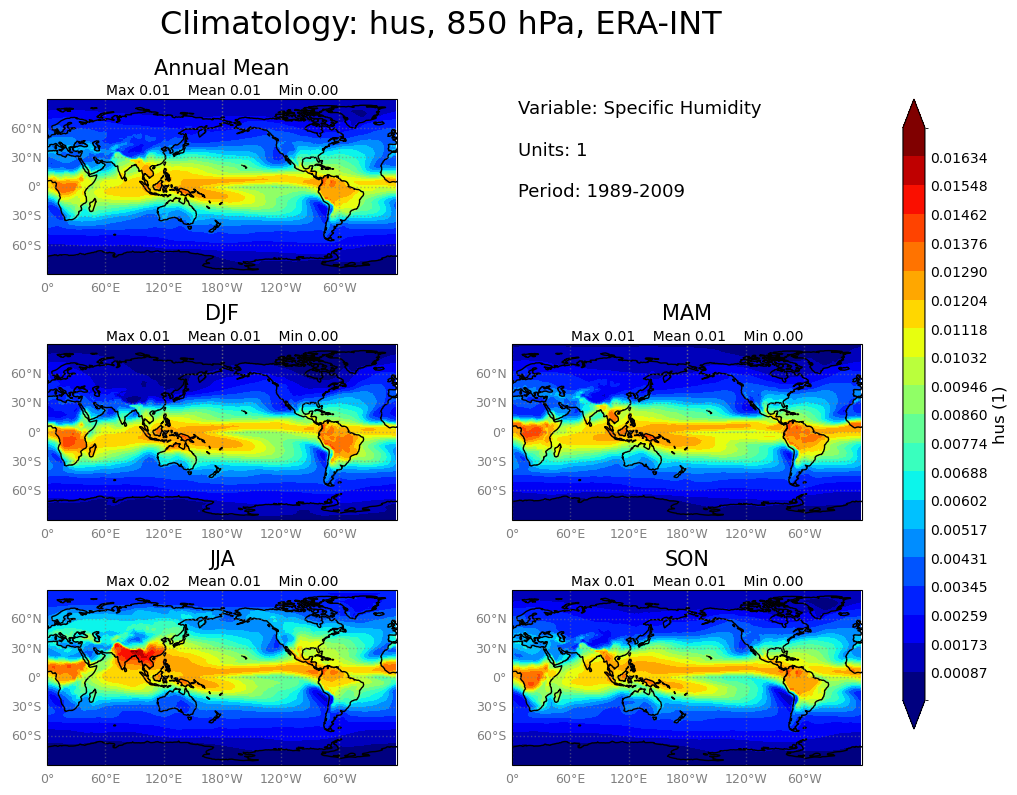

In [ ]:
encountered_variables = set()
ac_ref_dict = multi_level_dict()
ac_model_run_dict = multi_level_dict()
metrics_dict = multi_level_dict()



all_ref_variables = True

if all_ref_variables:
    variables = sorted(list(refs_dict.keys()))

variables_level_dict = get_unique_bases(variables)
variables_unique = list(variables_level_dict.keys())

print('variables_unique:', variables_unique)
print('variables_level_dict:', variables_level_dict)


def process_references(var, refs, rad_diagnostic_variables, levels, common_grid, start, end, version):
    for ref in refs:
        print(f"=== var, ref: {var}, {ref}")
        try:
            process_dataset(
                var, ref, refs_dict, ac_ref_dict, rad_diagnostic_variables, 
                encountered_variables, levels, common_grid, interim_output_path_dict["ref"], data_type="ref",
                start=start, end=end,     
                repair_time_axis=True,
                overwrite_output_ac=True,
                version=version
            )
        except Exception as e:
            # Log the error to a file
            logging.error(f"Error for {var} {ref}: {str(e)}")
            print(f"Error logged for {var} {ref}")
            print(f'Error from process_references for {var} {ref}:', e)
        
def process_models(var, models, models_runs_dict, rad_diagnostic_variables, levels, common_grid, refs, start, end, version):
    for model in models:
        for run in models_runs_dict[model]:
            try:
                process_dataset(
                    var, (model, run), models_dict, ac_model_run_dict, 
                    rad_diagnostic_variables, encountered_variables, levels, common_grid, 
                    interim_output_path_dict["model"], data_type="model",
                    start=start, end=end,
                    version=version
                )
                for level in levels:
                    ac_model_run_level_interp = ac_model_run_dict[var][model][run][level]
                    calculate_and_save_metrics(var, model, run, level, regions, refs, ac_ref_dict, ac_model_run_level_interp, output_path, refs_dict, metrics_dict)
            except Exception as e:
                print(f'Error from process_models for {var} {model} {run}:', e)

    for level in levels:
        if level is None:
             var_key = var
        else:
             var_key = f"{var}-{level}"
        write_to_json(metrics_dict[var_key], os.path.join(output_path, f"output_{var_key}.json"))


def main():  
    # Set version identifier using the current date if not provided
    version = datetime.datetime.now().strftime("v%Y%m%d")
    print("version:", version)

    start = "1981-01"
    end = "2013-12"

    for var in variables_unique:
        #try:
        if 1:
            print("var:", var)
            encountered_variables.add(var)
            levels = variables_level_dict[var]

            if var in refs_dict:
                refs = refs_dict[var].keys()
                process_references(var, refs, rad_diagnostic_variables, levels, common_grid, start, end, version)

            # process_models(var, models, models_runs_dict, rad_diagnostic_variables, levels, common_grid, refs, start, end, version)
        """
        except Exception as e:
            print(f'Error from main for {var}:', e)            
        """
if __name__ == "__main__":
    main()


In [ ]:
print_dict(refs_dict)

In [ ]:
print_dict(models_dict)

In [ ]:
import xcdat as xc

In [ ]:
f = "/p/user_pub/PCMDIobs/obs4MIPs/NOAA-ESRL-PSD/20CR/mon/psl/gn/v20230811/psl_mon_20CR_PCMDI_gn_187101-201212.nc"
ds = xc.open_dataset(f)